![개요](https://drive.google.com/uc?id=13pekH_cJAHc1lGUgE3SYqqEAO_cpoEll)

데이터 출처 : FRED 
![FRED](https://drive.google.com/uc?id=1odhsMY6cenJfbJNXIq3FAObZcjybpKVx)

# FRED에서 데이터를 불러오는 방법
1. FRED 가입하여 API 이용
2. 엑셀 다운로드 후, 불러오기
https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

# Daily 데이터
- 시계열 데이터 전처리
- plot : 일별, 주별 (resample)
- 월별 변동성 비교 (rolling) 

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')

In [5]:
df.head()

,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [0]:
df.columns=['KOUS']

In [0]:
df['KOUS'].replace('.', '', inplace=True)

In [0]:
df['KOUS']=pd.to_numeric(df['KOUS'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1251 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [0]:
df['KOUS'].fillna(method='ffill', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


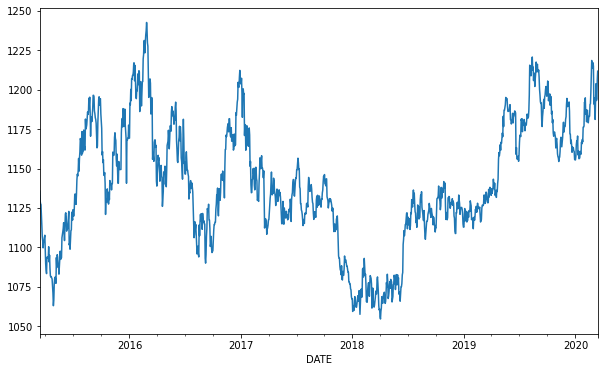

In [17]:
df['KOUS'].plot(figsize=(10,6))

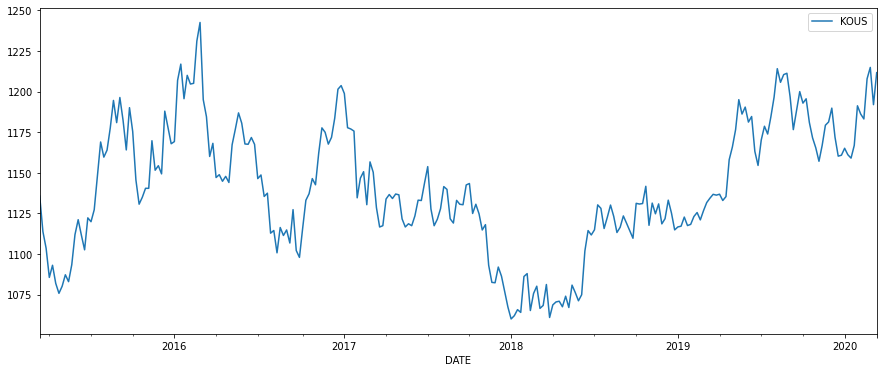

In [20]:
#  resample : 일별데이터 -> 주단위 데이터, 월단위 데이터로 변환
df.resample('M').last()
df.resample('W-Fri').last().plot(figsize=(15,6))

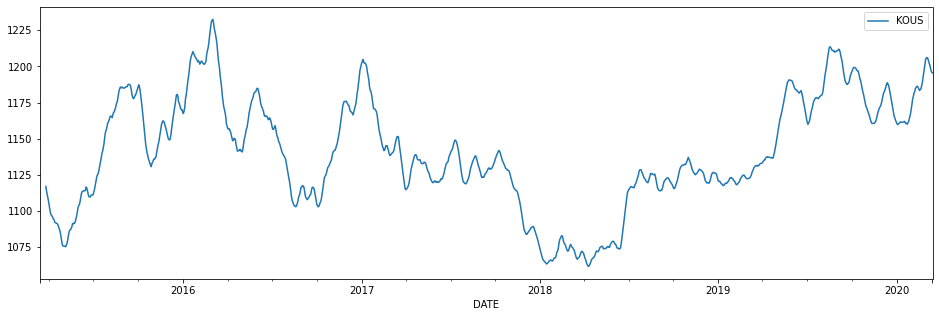

In [24]:
# rolling : 이전 xx일에 대한 이동평균, 이동 sum 을 산출할 때 사용
df.rolling(10).mean().plot(figsize=(16,5))

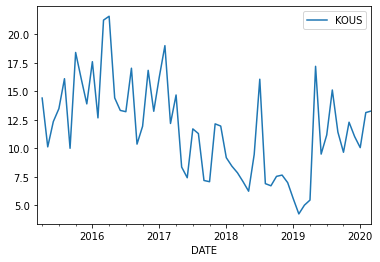

In [29]:
df.rolling(30).std().resample('M').mean().plot()

# 안정성 검정 (ADF Test)
- 귀무가설=안정적이지 않다 
- p-value가 0.05보다 작으면, 귀무가설 기각. 즉, 안정적인 시계열
- P-value가 0.05보다 크면, 귀무가설 채택. 즉, 불안정한 시계열
- 안정적인 데이터로 변경 : 변화율 / 로그 차분


In [31]:
adfuller(df['KOUS'])

(-2.6235188039221238,
 0.08823317575724848,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '10%': -2.56795049999266,
  '5%': -2.8637572934525286},
 8358.34690710183)

In [34]:
# y(t+1)/y(t) -1
# log(y(t+1))-log(y(t))
adfuller(df.KOUS.pct_change().dropna())
df.KOUS.pct_change().dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [37]:
(df.KOUS/df.KOUS.shift(1) -1).dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [39]:
(np.log(df.KOUS)-np.log(df.KOUS.shift(1))).dropna()

DATE
2015-03-16   -0.005368
2015-03-17   -0.001710
2015-03-18   -0.000532
2015-03-19   -0.005231
2015-03-20   -0.006568
                ...   
2020-03-09    0.009809
2020-03-10   -0.008887
2020-03-11    0.000888
2020-03-12    0.010024
2020-03-13    0.004558
Name: KOUS, Length: 1305, dtype: float64